In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt

In [2]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:
elders = te.getWBIndicator(series_code='SP.POP.65UP.TO.ZS', output_type='df')
data = te.getIndicatorData(country='all', indicators=['coronavirus deaths', 'population'], output_type='df')
covid_deaths = data[data['Category']=='Coronavirus Deaths']
population = data[data['Category']=='Population']

In [4]:
elders = elders[['country', 'last']].rename(columns={'last': 'Elders (% of total)', 'country': 'Country'}).set_index('Country')
covid_deaths = covid_deaths[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Deaths'}).set_index('Country')
population = population[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Population'}).set_index('Country')
df = covid_deaths.join(elders).join(population)
df['Deaths per 10.000 people'] = df['Deaths']/(df['Population']*100)
df = df[['Deaths per 10.000 people', 'Elders (% of total)']]
df.dropna(inplace=True)
df.sort_values(['Deaths per 10.000 people', 'Elders (% of total)'], ascending=False, inplace=True)
df = df.head(20)
df

,Deaths per 10.000 people,Elders (% of total)
Country,,
Peru,58.557462,8.39348
Hungary,30.599795,19.69446
Czech Republic,28.310280,19.80074
Bosnia and Herzegovina,27.738506,17.20115
Montenegro,25.951613,15.38917
Bulgaria,25.930935,21.25297
Brazil,23.827637,9.25161
Moldova,23.409091,12.01312
Slovenia,22.604762,20.18628


Plotting

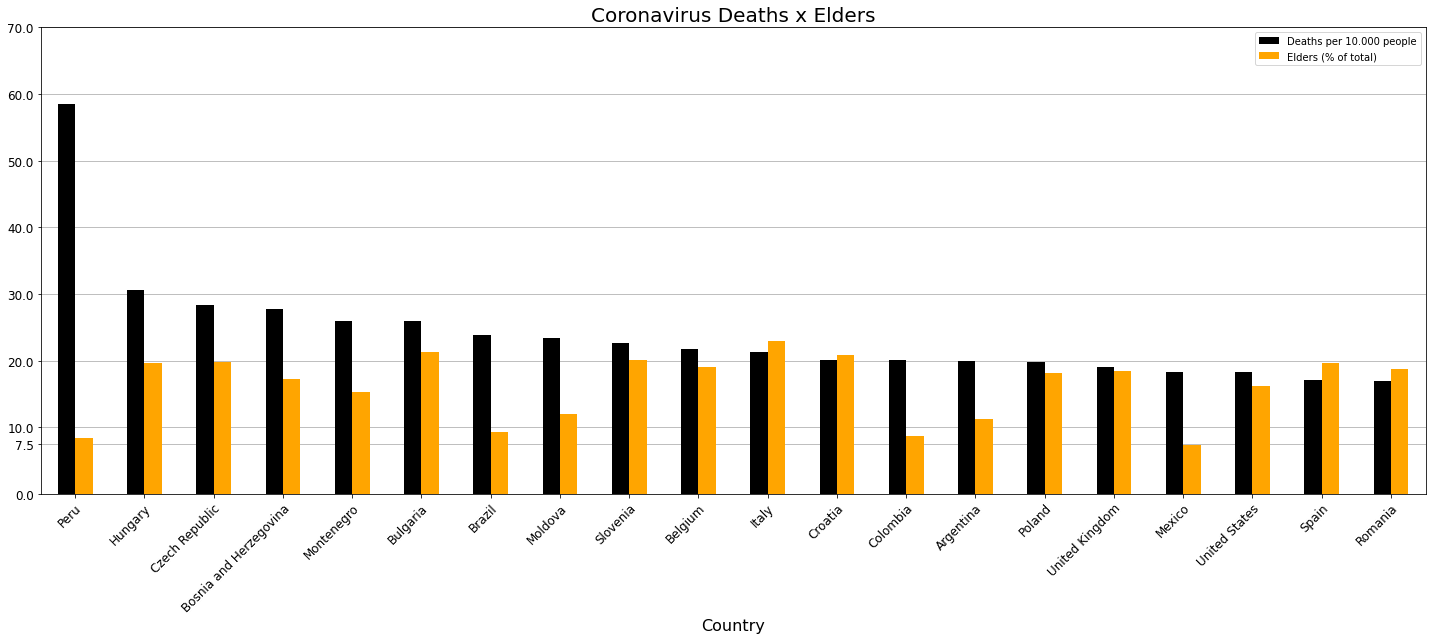

In [5]:
color_dict = {'Elders (% of total)': 'orange', 'Deaths per 10.000 people': 'black'}

df.plot(
    figsize=(20, 9),
    kind='bar',
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12
)

ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

plt.yticks(list(plt.yticks()[0]) + [7.5])
ax.yaxis.grid(zorder=0)
ax.set_title('Coronavirus Deaths x Elders', color='black', size=20)
plt.xlabel('Country', fontsize=16)
plt.tight_layout()